In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
boW = CountVectorizer(ngram_range=(1, 1))
tfidf = TfidfVectorizer(ngram_range=(1, 1))

In [4]:
df_train = pd.read_csv("cleaned_data_train.csv")
df_train.head()

Unnamed: 0                                      Final_Summary  \
0      517345  ive  bought hundreds we are big pepperoni fans...   
1      176230  a hit with my grandson can t say that i ve tri...   
2      543075  excellent low carb bread this bread is excelle...   
3      274014  babybmom my   mo  old daughter only eats earth...   
4       29162  gumbo mix this gumbo is fantastic   everyone t...   

               Final_Summary_Reg_Lower_Lem_StopWords  Score  
0  ive  bought hundred big pepperoni fan house ea...      5  
1  hit grandson say tried  grandson really like l...      5  
2  excellent low carb bread bread excellent  love...      5  
3  babybmom   mo  old daughter eats earth best pr...      2  
4  gumbo mix gumbo fantastic   everyone ate loved...      5

In [5]:
df_train.shape

(454516, 4)

In [6]:
df_train.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df_train.head()

Final_Summary  \
0  ive  bought hundreds we are big pepperoni fans...   
1  a hit with my grandson can t say that i ve tri...   
2  excellent low carb bread this bread is excelle...   
3  babybmom my   mo  old daughter only eats earth...   
4  gumbo mix this gumbo is fantastic   everyone t...   

               Final_Summary_Reg_Lower_Lem_StopWords  Score  
0  ive  bought hundred big pepperoni fan house ea...      5  
1  hit grandson say tried  grandson really like l...      5  
2  excellent low carb bread bread excellent  love...      5  
3  babybmom   mo  old daughter eats earth best pr...      2  
4  gumbo mix gumbo fantastic   everyone ate loved...      5

In [8]:
df_train.isna().sum()
df_train.dropna(inplace=True)

In [9]:
df_train[df_train.duplicated()]

Final_Summary  \
597     bad  old  products    this product that i reci...   
1305    yummy healthy treats  we re going through trai...   
1605    because our kids aren t obese enough thank you...   
1619    yeast extract   msg  they do contain preservat...   
1634    great k cup coffee quick delivery and we reall...   
...                                                   ...   
454498  perfect for small dogs our two dogs love this ...   
454500  i love this salt i love pink himalayan salt  i...   
454510  tricks for treats pick up the bag  give it a s...   
454511  best tasting fruit and nut bar i have ever eat...   
454512  coffee i like keurig coffee   especially like ...   

                    Final_Summary_Reg_Lower_Lem_StopWords  Score  
597     bad  old  product    product recieved old    d...      1  
1305    yummy healthy treat  going training school pup...      5  
1605    kid obese enough thank gerber  helping u get k...      1  
1619    yeast extract   msg  contain preservative  fyi...      1  
1634    great k cup coffee quick delivery really like ...      5  
...                                                   ...    ...  
454498  perfect small dog two dog love product  love f...      5  
454500  love salt love pink himalayan salt  loaded min...      5  
454510  trick treat pick bag  give shake cat come runn...      5  
454511  best tasting fruit nut bar ever eaten trying f...      5  
454512  coffee like keurig coffee   especially like it...      5  

[128214 rows x 3 columns]

In [10]:
df_train.shape

(454516, 3)

In [11]:
df_train.loc[597,"Final_Summary_Reg_Lower_Lem_StopWords"]

'bad  old  product    product recieved old    dog turned nose    dog really love fresh    must   yr old    believe amazon sold    bad  old  product   '

In [12]:
from nltk.corpus import stopwords
cust_stopwords = ['br', 'http', 'www', 'k']
stop_words = stopwords.words("english")
stop_words = stop_words+cust_stopwords
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
# txt = 'bad  old  product    product recieved old    dog turned nose    dog really love fresh    must   yr old    believe amazon sold    bad  old  product   '
def set_unique_words(txt):
    res = lambda txt: ' '.join(set(row_word for row_word in txt.split(" ") if row_word not in stop_words))
    return res(txt)
# set_unique_words(txt)

In [14]:
df_train["Final_Summary_Reg_Lower_Lem_StopWords"] = df_train["Final_Summary_Reg_Lower_Lem_StopWords"].apply(lambda row_word: set_unique_words(row_word))
df_train.head(5)

Final_Summary  \
0  ive  bought hundreds we are big pepperoni fans...   
1  a hit with my grandson can t say that i ve tri...   
2  excellent low carb bread this bread is excelle...   
3  babybmom my   mo  old daughter only eats earth...   
4  gumbo mix this gumbo is fantastic   everyone t...   

               Final_Summary_Reg_Lower_Lem_StopWords  Score  
0   tried great remember turkey pepperoni house c...      5  
1    tried really like fact organic say grandson hit      5  
2   hearty would wheat low fiber grain excellent ...      5  
3   tried baby best chicken would great bite rest...      2  
4   loved everyone got mix gumbo wanted item ate ...      5

In [15]:
X_train = boW.fit_transform(df_train["Final_Summary_Reg_Lower_Lem_StopWords"])
X_train

<454516x98067 sparse matrix of type '<class 'numpy.int64'>'
	with 15479510 stored elements in Compressed Sparse Row format>

In [16]:
y_train = df_train.Score
y_train.head()

0    5
1    5
2    5
3    2
4    5
Name: Score, dtype: int64

In [17]:
len(boW.get_feature_names_out())

98067

In [18]:
boW.vocabulary_

{'tried': 88502,
 'great': 37087,
 'remember': 71592,
 'turkey': 89078,
 'pepperoni': 63576,
 'house': 40932,
 'could': 18914,
 'heated': 39320,
 'ive': 44711,
 'eat': 26219,
 'coming': 16917,
 'compare': 17102,
 'stuff': 82652,
 'closest': 16057,
 'even': 28947,
 'find': 31512,
 'hundred': 41314,
 'boar': 9120,
 'long': 50176,
 'save': 75116,
 'real': 70036,
 'fan': 30418,
 'unhealthy': 90495,
 'bought': 9733,
 'subscribe': 82863,
 'head': 39137,
 'better': 7880,
 'big': 8120,
 'salad': 74400,
 'much': 56128,
 'really': 70088,
 'like': 49342,
 'fact': 30189,
 'organic': 60801,
 'say': 75184,
 'grandson': 36856,
 'hit': 40164,
 'hearty': 39313,
 'would': 95924,
 'wheat': 94584,
 'low': 50575,
 'fiber': 31270,
 'grain': 36744,
 'excellent': 29318,
 'dense': 22230,
 'need': 57335,
 'white': 94796,
 'found': 33037,
 'texture': 86062,
 'went': 94370,
 'double': 25070,
 'probably': 67257,
 'one': 60214,
 'regular': 71225,
 'last': 48351,
 'bread': 10113,
 'carb': 12489,
 'healthier': 39210,

In [19]:
# df_boW = pd.DataFrame(X_train.toarray(), columns=boW.get_feature_names_out())
# df_boW.head()

In [20]:
df_train.columns

Index(['Final_Summary', 'Final_Summary_Reg_Lower_Lem_StopWords', 'Score'], dtype='object')

In [21]:
 def create_worcloud(score1, score2):
    from wordcloud import WordCloud
    words= []
    review_4_5_df = df_train.loc[(df_train["Score"]== score1) | (df_train["Score"]== score2), :]
    words = " ".join(review_4_5_df["Final_Summary_Reg_Lower_Lem_StopWords"])
    cleaned_words = ' '.join([word for word in words.split(' ')])
    cleaned_words[:200]

    from nltk.corpus import stopwords
    good_wordcloud = WordCloud(width=1600, 
                              height=800,
                              max_words= 500,
                              stopwords=stopwords.words("english")).generate(cleaned_words)

    import matplotlib.pyplot as plt
    plt.figure(1,figsize=(30,20))
    plt.imshow(good_wordcloud)
    plt.axis('off')
    plt.show()

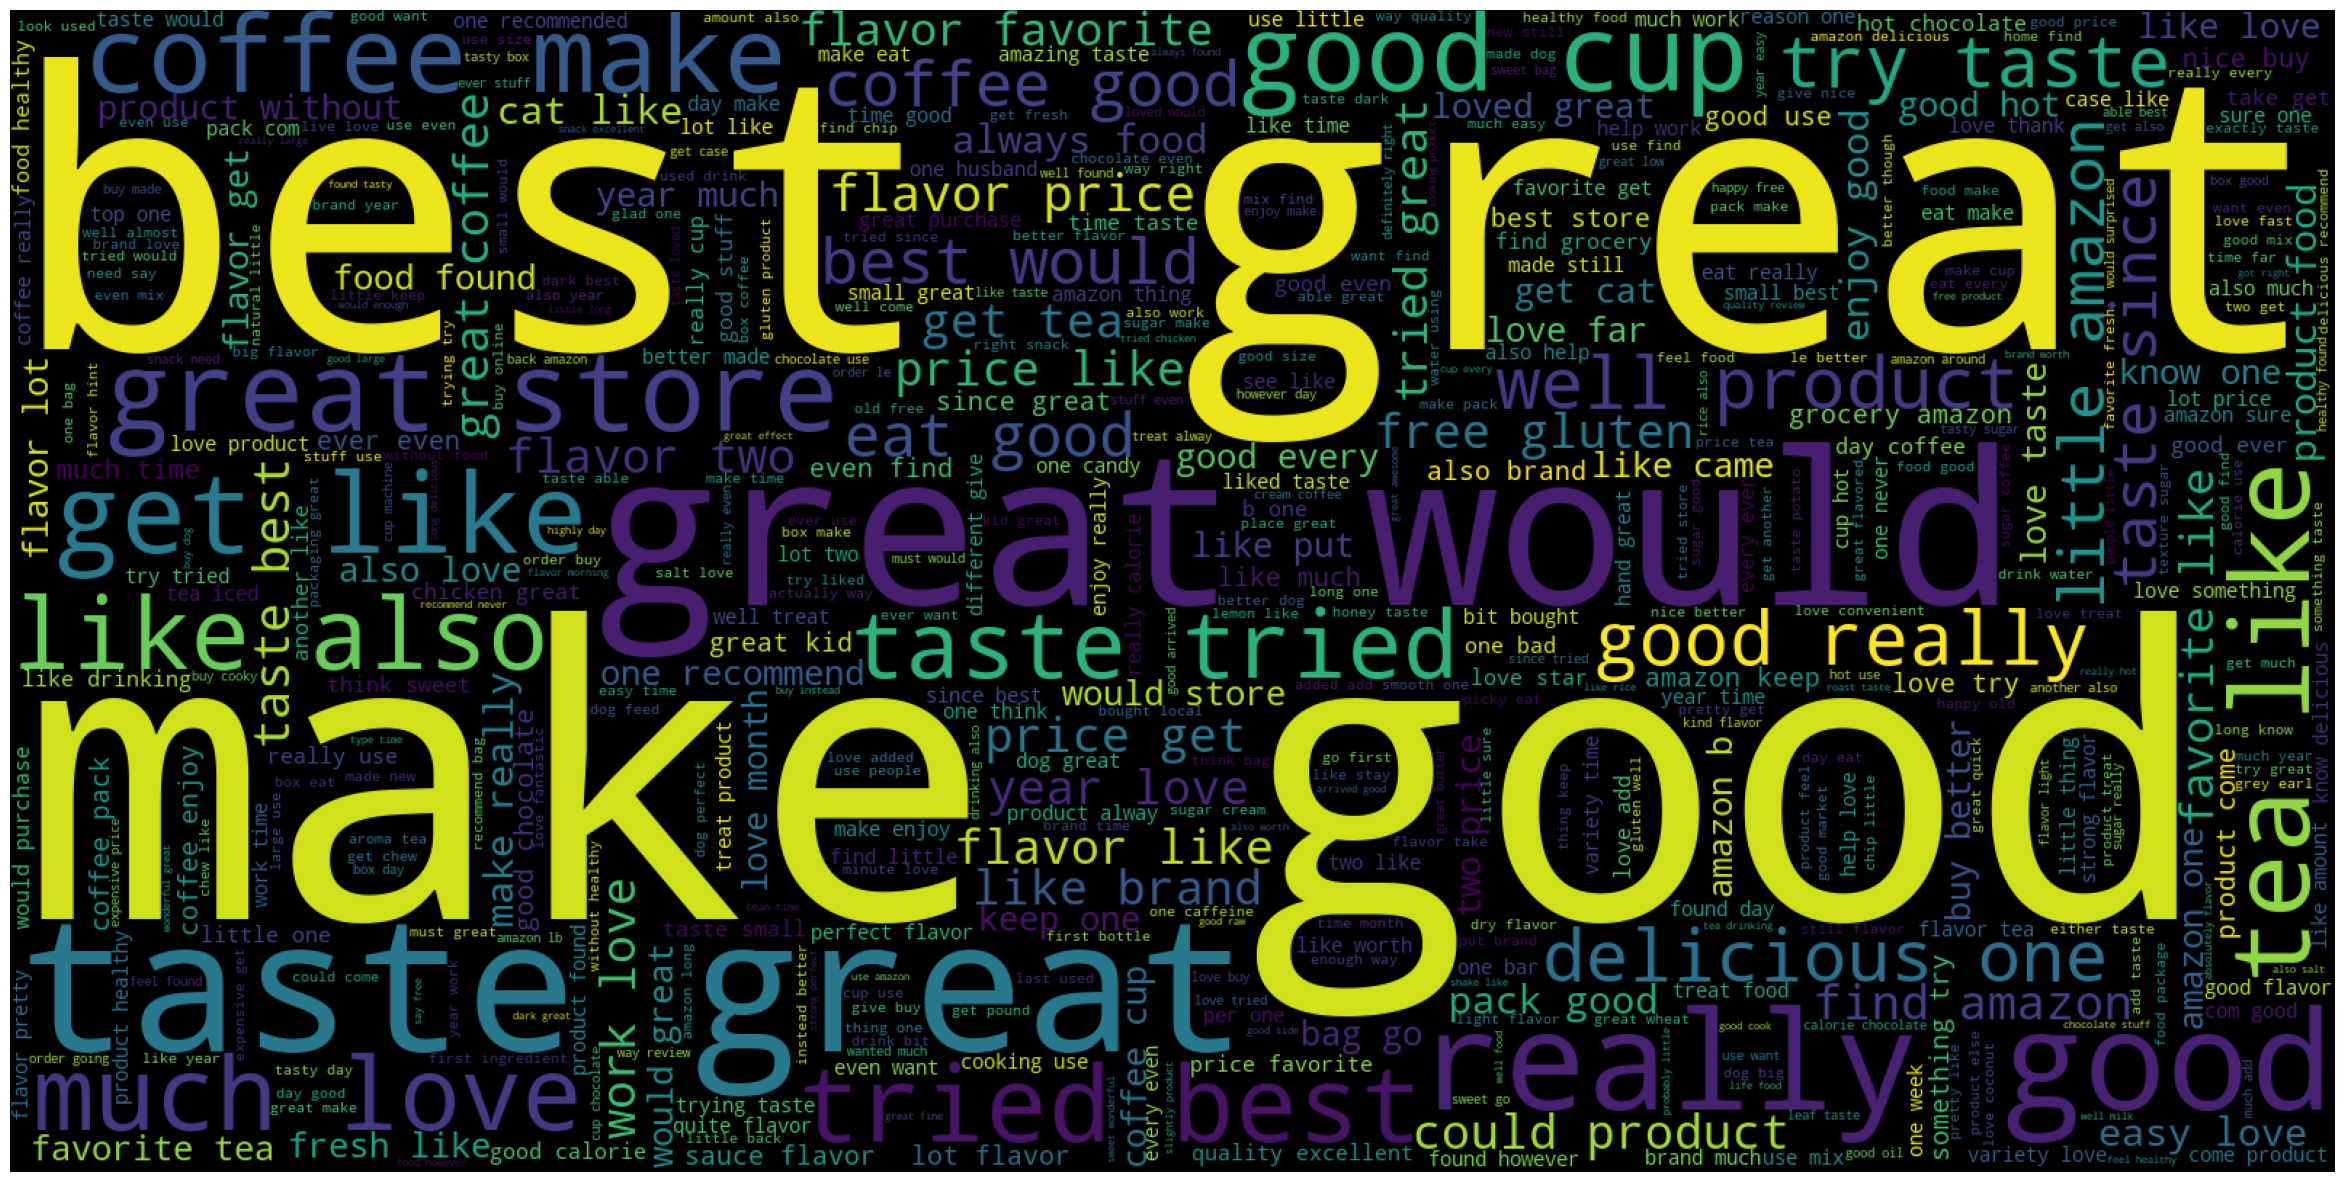

In [22]:
# Create a worcloud for Scores 4 and Scores 5
create_worcloud(4, 5)

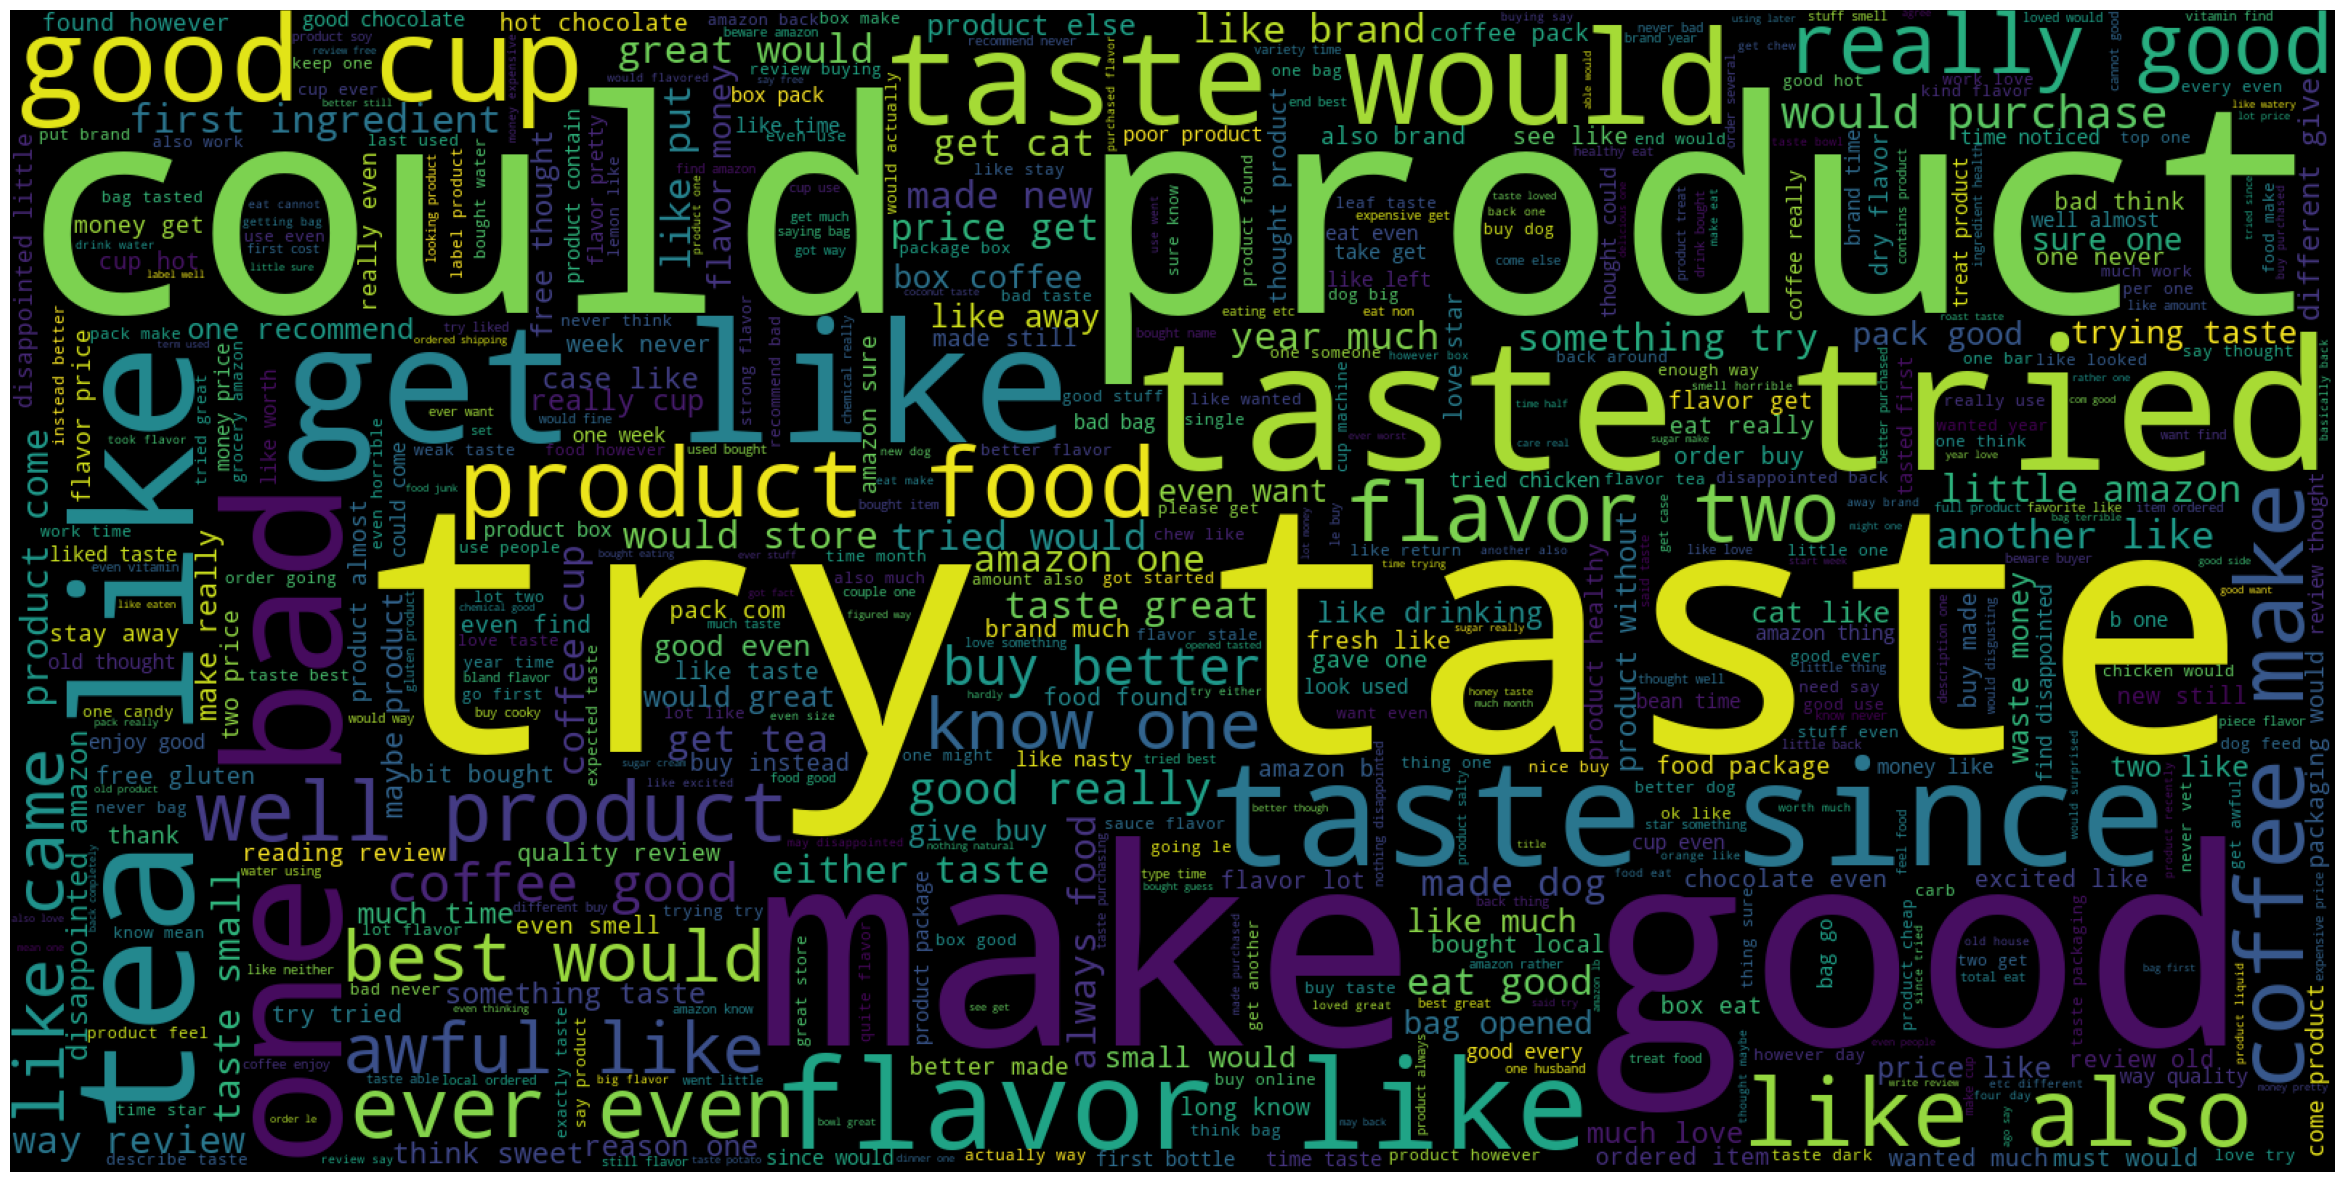

In [23]:
# Create a worcloud for Scores 1 and Scores 2
create_worcloud(1, 2)

In [24]:
df_test = pd.read_csv("cleaned_data_test.csv")
df_test.head()

Unnamed: 0                                      Final_Summary  \
0       25886  can t ask for more great product and price   i...   
1      472292  nothing special ordered these thinking they we...   
2      388572  decaf  this can t be decaf  this is one of the...   
3      152448  cookie crumbs walkers cookies or biscuits alwa...   
4       80489  mmm   not your typical store bought sauce   go...   

               Final_Summary_Reg_Lower_Lem_StopWords  Score  
0  ask great product price   little reluctant pur...      5  
1  nothing special ordered thinking thick pleasan...      3  
2  decaf  decaf  one best tea bag buy  decaf  lov...      5  
3  cookie crumb walker cooky biscuit always five ...      3  
4  mmm   typical store bought sauce   gotta try  ...      5

In [25]:
df_test.drop('Unnamed: 0', axis=1, inplace=True)
df_test.head()

Final_Summary  \
0  can t ask for more great product and price   i...   
1  nothing special ordered these thinking they we...   
2  decaf  this can t be decaf  this is one of the...   
3  cookie crumbs walkers cookies or biscuits alwa...   
4  mmm   not your typical store bought sauce   go...   

               Final_Summary_Reg_Lower_Lem_StopWords  Score  
0  ask great product price   little reluctant pur...      5  
1  nothing special ordered thinking thick pleasan...      3  
2  decaf  decaf  one best tea bag buy  decaf  lov...      5  
3  cookie crumb walker cooky biscuit always five ...      3  
4  mmm   typical store bought sauce   gotta try  ...      5

In [26]:
df_test["Final_Summary_Reg_Lower_Lem_StopWords"] = df_test["Final_Summary_Reg_Lower_Lem_StopWords"].apply(lambda row_word: set_unique_words(row_word))
df_test.head(5)

Final_Summary  \
0  can t ask for more great product and price   i...   
1  nothing special ordered these thinking they we...   
2  decaf  this can t be decaf  this is one of the...   
3  cookie crumbs walkers cookies or biscuits alwa...   
4  mmm   not your typical store bought sauce   go...   

               Final_Summary_Reg_Lower_Lem_StopWords  Score  
0   great purchase nut well product food adding a...      5  
1   surprised store special hour thinking nothing...      3  
2   best kid bold color way decaf blend say cut m...      5  
3   storing actually container collect always how...      3  
4   tip chicken best store rib bbq mmm happy brin...      5

In [27]:
X_test = boW.transform(df_test["Final_Summary_Reg_Lower_Lem_StopWords"])
X_test

<113630x98067 sparse matrix of type '<class 'numpy.int64'>'
	with 3846739 stored elements in Compressed Sparse Row format>

In [28]:
y_test = df_test.Score

In [29]:
%%time
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
y_pred_dt

CPU times: user 1h 8min 7s, sys: 44.5 s, total: 1h 8min 51s
Wall time: 1h 15min 50s


array([5, 1, 5, ..., 5, 5, 5])

In [64]:
%%time
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf

CPU times: user 1h 57min 51s, sys: 1min 29s, total: 1h 59min 21s
Wall time: 2h 33min 2s


array([5, 3, 5, ..., 5, 5, 5])

In [70]:
%%time
# XGBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier
xgb_classifier = GradientBoostingClassifier()

xgb_classifier.fit(X_train, y_train)

y_pred_xg = xgb_classifier.predict(X_test)
y_pred_xg

CPU times: user 59min 47s, sys: 2min 5s, total: 1h 1min 53s
Wall time: 1h 38min 7s


array([5, 3, 5, ..., 5, 5, 5])

In [31]:
def metric_class(classifier, y_pred, y_test):
    from sklearn.metrics import accuracy_score, classification_report, precision_score, confusion_matrix
    print("*"*116)
    print("Classifier: ", classifier)
    print("*"*40)
    accuracy_score_ = accuracy_score(y_pred, y_test)
    print("accuracy_score: {0:.2f}%".format(accuracy_score_ * 100))
    print("*"*40)
#     conf_matrix = confusion_matrix(y_pred, y_test)
#     print("Confusion Matrix:", conf_matrix)
#     print("*"*40)  
    class_report = classification_report(y_pred, y_test)
    print("Classification Report: \n")
    print(class_report)


In [32]:
metric_class("Decision Tree Classifier", y_pred_dt, y_test)
# metric_class("Random Forest Classifier", y_pred_rf, y_test)
# metric_class("GradientBoosting Classifier", y_pred_xg, y_test)
# metric_class("Decision Tree", y_pred, y_test)

********************************************************************************************************************
Classifier:  Decision Tree Classifier
****************************************
accuracy_score: 76.38%
****************************************
Classification Report: 

              precision    recall  f1-score   support

           1       0.66      0.67      0.66     10317
           2       0.46      0.53      0.50      5234
           3       0.51      0.54      0.52      7918
           4       0.52      0.56      0.54     15046
           5       0.89      0.86      0.87     75115

    accuracy                           0.76    113630
   macro avg       0.61      0.63      0.62    113630
weighted avg       0.77      0.76      0.77    113630



In [33]:
import pickle

In [34]:
rf_amazon_rev_bow = "rf_amazon_rev_bow.sav"
pickle.dump(boW, open(rf_amazon_rev_bow, "wb"))

rf_amazon_rev = "rf_amazon_rev.sav"
pickle.dump(dt_classifier, open(rf_amazon_rev, "wb"))

In [35]:
rf_bow_amazon_rev = pickle.load(open("rf_amazon_rev_bow.sav", "rb"))
rf_amazon_rev = pickle.load(open("rf_amazon_rev.sav", "rb"))

In [118]:
import re
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

final_text = 'its a good product' 
final_text = list(map(lambda x:x.replace(":)", "good "),  final_text.split(" ")))
final_text = list(map(lambda x:x.replace(":(", "bad "),  final_text))
final_text_re = re.sub("[^a-zA-Z]", " ", str(final_text).lower())
final_text_re
lemmatize = WordNetLemmatizer() # stemmer = PorterStemmer()
stop_words = stopwords.words("english") + ["br", "html", "www", "k", "http"]
# stop_words
lem_text = [lemmatize.lemmatize(x.lower()) for x in final_text_re.split(" ") if x not in stop_words]
lem_text = [lemmatize.lemmatize(x) for x in lem_text if x!=""]
lem_text = " ".join([x for x in lem_text])
lem_text

def set_unique_words(lem_text):
    res = lambda lem_text: ' '.join(set(row_word for row_word in lem_text.split(" ") if row_word not in stop_words))
    return res(lem_text)
set_unique_words(lem_text)

'good product'

In [117]:
X_test_ = rf_bow_amazon_rev.transform(pd.DataFrame([lem_text]).loc[0])
singl_row = X_test_.toarray().reshape(1, -1)

score = rf_amazon_rev.predict(singl_row)
score

array([5])